Step 1: Installing ktrain

In [1]:
#installing ktrain
!pip install ktrain

     |████████████████████████████████| 25.3MB 176kB/s 
     |████████████████████████████████| 421.8MB 38kB/s 
     |████████████████████████████████| 983kB 52.8MB/s 
     |████████████████████████████████| 245kB 53.1MB/s 
     |████████████████████████████████| 890kB 52.5MB/s 
     |████████████████████████████████| 471kB 53.1MB/s 
     |████████████████████████████████| 3.9MB 49.1MB/s 
     |████████████████████████████████| 51kB 5.4MB/s 
     |████████████████████████████████| 450kB 51.1MB/s 
     |████████████████████████████████| 890kB 48.8MB/s 
     |████████████████████████████████| 1.1MB 50.5MB/s 
     |████████████████████████████████| 3.0MB 44.6MB/s 
  Created wheel for ktrain: filename=ktrain-0.20.2-cp36-none-any.whl size=25268858 sha256=9de3c915418bd4aacc37051614214173a1a5356763d8aec4d637eb02cdc21d32
  Stored in directory: /root/.cache/pip/wheels/39/cb/df/46a2a4009de6e87d908d89dabdd78216bf7396eb2150ca1bfc
  Created wheel for keras-bert: filename=keras_bert-0.86.0-cp36-none

Step 2: Importing modules and reading the training file

In [30]:
%%time
import time
import ktrain
from ktrain import text
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

CPU times: user 28 µs, sys: 0 ns, total: 28 µs
Wall time: 32.2 µs


In [31]:
data=pd.read_csv("/content/drive/My Drive/Sentiment Analysis_Preskale/Cleaned_reviews.csv",index_col="Unnamed: 0")
data.head()

,userName,content,score,Polarity,clean_text,common_words
0,Andrew Thomas,Update: After getting a response from the deve...,1,Negative,update getting response developer would change...,"['update', 'getting', 'response', 'developer',..."
1,Craig Haines,Used it for a fair amount of time without any ...,1,Negative,used fair amount time without problem suddenly...,"['used', 'fair', 'amount', 'time', 'without', ..."
2,steven adkins,Your app sucks now!!!!! Used to be good but no...,1,Negative,app suck used good doesnt update physically op...,"['app', 'suck', 'used', 'good', 'doesnt', 'upd..."
3,Lars Panzerbjørn,"It seems OK, but very basic. Recurring tasks n...",1,Negative,seems ok basic recurring task need work actual...,"['seems', 'ok', 'basic', 'recurring', 'task', ..."
4,Scott Prewitt,Absolutely worthless. This app runs a prohibit...,1,Negative,absolutely worthless app run prohibitively clu...,"['absolutely', 'worthless', 'app', 'run', 'pro..."


In [32]:
data=data.loc[:,["content","Polarity","clean_text"]]
data.columns

Index(['content', 'Polarity', 'clean_text'], dtype='object')

In [33]:
data.Polarity.value_counts()

Positive    5676
Neutral     5042
Negative    5028
Name: Polarity, dtype: int64

In [25]:
# cond=[df.Polarity=="Positive",df.Polarity=="Neutral",df.Polarity=="Negative"]
# choice=[2,1,0]
# df.Polarity=np.select(cond,choice)
# df.Polarity.head()

0    0
1    0
2    0
3    0
4    0
Name: Polarity, dtype: int64

In [26]:
# #Splitting the data into X,y

# X=df["content"]
# y=df["Polarity"]
# X_train,X_test,y_train,y_test=train_test_split(X,y,shuffle=True,test_size=0.30, random_state=1)

In [27]:
type(X_train)

pandas.core.series.Series

In [28]:

# print(f"X_train: {X_train.shape}")
# print(f"y_train: {y_train.shape}")
# print(f"X_test: {X_test.shape}")
# print(f"y_test: {y_test.shape}")

X_train: (11022,)
y_train: (11022,)
X_test: (4724,)
y_test: (4724,)


####Step 3: Convert data to Features for BERT
ktrain provides a very convenient feature of directly converting the text
data directly into features for the model that is needed. All the text
preprocessing steps do not need to be manually performed and will be
taken care of by the library itself. Since we will be reading the data from
pandas series objects, we will use the function texts_from_array .


In [36]:
(X_train_bert,y_train_bert), (X_val_bert,y_val_bert), preproc= text.texts_from_df(train_df=data,
                                                                                  text_column="content",
                                                                                  label_columns="Polarity",
                                                                                  maxlen=150,
                                                                                  preprocess_mode='bert')

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


Step 4: Load Bert in a learner object

In [37]:
model = text.text_classifier(name = 'bert',
                             train_data = (X_train_bert, y_train_bert),
                             preproc = preproc)

Is Multi-Label? False
maxlen is 150
done.


The  function " text_classifier " loads the pre-trained BERT model with a randomly initialized final Dense layer. It is worthwhile to mention that although the final Dense layer is randomly initialized, it will not be only one getting updated during the training process. Since we have not frozen any layers and all the layers of the model are trainable, the weights of all the layers of the model will be updated during backpropagation.

In [38]:
learner = ktrain.get_learner(model=model, train_data=(X_train_bert, y_train_bert),
                   val_data = (X_val_bert, y_val_bert),
                   batch_size =6)

The function " get_learner " creates a learner object with train and validation data which can be used to fine-tune the classifier. The last argument of get_learner is the batch size. We use a small batch size of 10.

Step 5: Training (Finetuning the BERT Classifier)

In [ ]:
#learner.lr_find() to find the best learning rate

In [40]:
#Essentially fit is a very basic training loop, whereas fit one cycle uses the one cycle policy callback

history=learner.fit_onecycle(lr = 2e-5, epochs = 1)



begin training using onecycle policy with max lr of 2e-05...
Train on 14171 samples, validate on 1575 samples
14171/14171 [==============================] - 22014s 2s/sample - loss: 0.7335 - accuracy: 0.6621 - val_loss: 0.5663 - val_accuracy: 0.7606


In [44]:
history.history

{'accuracy': [0.6620563],
 'iterations': [1.0,
  2.0,
  3.0,
  4.0,
  5.0,
  6.0,
  7.0,
  8.0,
  9.0,
  10.0,
  11.0,
  12.0,
  13.0,
  14.0,
  15.0,
  16.0,
  17.0,
  18.0,
  19.0,
  20.0,
  21.0,
  22.0,
  23.0,
  24.0,
  25.0,
  26.0,
  27.0,
  28.0,
  29.0,
  30.0,
  31.0,
  32.0,
  33.0,
  34.0,
  35.0,
  36.0,
  37.0,
  38.0,
  39.0,
  40.0,
  41.0,
  42.0,
  43.0,
  44.0,
  45.0,
  46.0,
  47.0,
  48.0,
  49.0,
  50.0,
  51.0,
  52.0,
  53.0,
  54.0,
  55.0,
  56.0,
  57.0,
  58.0,
  59.0,
  60.0,
  61.0,
  62.0,
  63.0,
  64.0,
  65.0,
  66.0,
  67.0,
  68.0,
  69.0,
  70.0,
  71.0,
  72.0,
  73.0,
  74.0,
  75.0,
  76.0,
  77.0,
  78.0,
  79.0,
  80.0,
  81.0,
  82.0,
  83.0,
  84.0,
  85.0,
  86.0,
  87.0,
  88.0,
  89.0,
  90.0,
  91.0,
  92.0,
  93.0,
  94.0,
  95.0,
  96.0,
  97.0,
  98.0,
  99.0,
  100.0,
  101.0,
  102.0,
  103.0,
  104.0,
  105.0,
  106.0,
  107.0,
  108.0,
  109.0,
  110.0,
  111.0,
  112.0,
  113.0,
  114.0,
  115.0,
  116.0,
  117.0,
  118.0,
  119.

In [45]:
type(history.history)

dict

In [46]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr', 'iterations', 'momentum'])

In [54]:
report=learner.validate(val_data=(X_val_bert, y_val_bert),class_names=['Negative', 'Neutral','Positive'])

              precision    recall  f1-score   support

    Negative       0.74      0.83      0.78       461
     Neutral       0.64      0.63      0.64       481
    Positive       0.87      0.81      0.84       633

    accuracy                           0.76      1575
   macro avg       0.75      0.76      0.75      1575
weighted avg       0.76      0.76      0.76      1575



In [57]:
report

array([[382,  71,   8],
       [110, 301,  70],
       [ 23,  95, 515]])

In [72]:
#plotting confusion matrix
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,normalize=False,title='BERT Confusion matrix',cmap=plt.cm.YlOrRd):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="right",
                 color="White" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


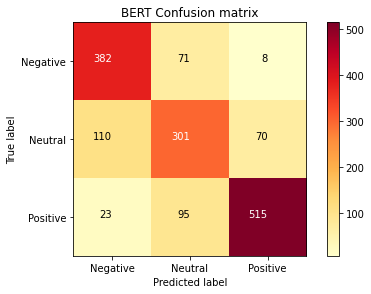

In [79]:
import itertools
from google.colab import files
# plt.figure(figsize=(5,5))
plot_confusion_matrix(report, classes=['Negative', 'Neutral','Positive'])
# files.download( "bert confusion matrix.jpg" )    

In [52]:
learner.print_layers()

0 (trainable=True) : <tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f2320c29240>
1 (trainable=True) : <tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f2320c292e8>
2 (trainable=True) : <keras_bert.layers.embedding.TokenEmbedding object at 0x7f2320c29128>
3 (trainable=True) : <tensorflow.python.keras.layers.embeddings.Embedding object at 0x7f2320c29438>
4 (trainable=True) : <tensorflow.python.keras.layers.merge.Add object at 0x7f2320c297b8>
5 (trainable=True) : <keras_pos_embd.pos_embd.PositionEmbedding object at 0x7f232314d198>
6 (trainable=True) : <tensorflow.python.keras.layers.core.Dropout object at 0x7f2321879e48>
7 (trainable=True) : <keras_layer_normalization.layer_normalization.LayerNormalization object at 0x7f232186a828>
8 (trainable=True) : <keras_multi_head.multi_head_attention.MultiHeadAttention object at 0x7f232186ab70>
9 (trainable=True) : <tensorflow.python.keras.layers.core.Dropout object at 0x7f23218e17f0>
10 (trainable=True) : <t

### Getting predictor variable

In [47]:
predictor = ktrain.get_predictor(learner.model, preproc)


#### Saving the Model

In [ ]:
predictor.save('/content/drive/My Drive/Sentiment Analysis_Preskale')

In [58]:
#sample dataset to test on
data = ['this movie was horrible, the plot was really boring. acting was okay',
 'the fild is really sucked. there is not plot and acting was bad',
 'what a beautiful movie. great plot. acting was good. will see it again']


In [59]:
predictor.predict(data)

['Negative', 'Negative', 'Positive']

In [60]:
#loading the model
predictor_load = ktrain.load_predictor('/content/drive/My Drive/Sentiment Analysis_Preskale')


In [61]:
predictor_load.predict(data)

['Negative', 'Negative', 'Positive']